In [ ]:
# For Basic Operations
import numpy as np
import pandas as pd

In [ ]:
# for Datetime Manipulation
import datetime

In [ ]:
# For Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# for Interactive Analysis
from ipywidgets import interact

In [ ]:
# lets import the Dataset
data = pd.read_csv('../input/imdb-recommendation-engine/movies.csv')
data.head()

In [ ]:
data.info()

In [ ]:
data.shape

In [ ]:
data.describe()

In [ ]:
# lets also check the ratings dataset
rating = pd.read_csv('../input/imdb-recommendation-engine/ratings.csv')
rating.head()

In [ ]:
rating.info()

In [ ]:
rating.describe()

In [ ]:
rating.shape

In [ ]:
# As we are going to Perform the Content Based Filtering
# lets merge the rating data with the movie data
data = pd.merge(data, rating, on = 'movieId', how = 'inner')
data.head()

In [ ]:
# lets check the shape of the Merged Dataset
data.shape

In [ ]:
data.info()

In [ ]:
# As we do not Require the MovieId, UserId and Timestamp lets remove them
data = data.drop(['movieId', 'userId', 'timestamp'], axis = 1)

# lets check the head of the Final Dataset
data.head()

In [ ]:
# Now, We Have to Groupby the Dataset Based on the Movie Title

data = pd.pivot_table(data, index = ['title','genres'], aggfunc = 'mean')
data.reset_index(level=['title','genres'], inplace = True)
data.head()

In [ ]:
# lets check the Distribution of Ratings across the Movies

sns.displot(x=data['rating'], color = 'black',kde=True,height=5)
plt.title('Distribution of Ratings')
plt.grid()

In [ ]:
# Lets Extract Year of Release from the Movie Title
data['y'] = data['title'].str.split(' ')
data['year'] = data['y'].apply(lambda x: x[-1])
data.head()

In [ ]:
# lets drop the unnecessary 'y' column from the dataset
data = data.drop(['y'], axis = 1)
data.head()

In [ ]:
# lets remove the Opening and Closing Brackets from the String
data['year'] = data['year'].str.strip(')')
data['year'] = data['year'].str.strip('(')
data.head()

In [ ]:
data['year'].value_counts()[:5]

In [ ]:
data['year'].unique()

In [ ]:
data[data.year.isin(['Road', ''])]

In [ ]:
# There are some Dirty Values, Let's Clean them
data['year'] = data['year'].replace(('Road', ''),
                                   ('2015','2011'))
data['year'].unique()

In [ ]:
# lets convert the year column into Integer data type
data['year'] = data['year'].astype(int)
data.info()

In [ ]:
# lets check the head of the dataset again
data.head()

In [ ]:
# lets remove the Year from the Movie Titles
data['title'] = data['title'].str.split(' ')
data['title'] = data['title'].apply(lambda x: ' '.join(x[:-1]))
# lets check the head of the dataset again
data.head()

In [ ]:
# Lets check the Latest Movies - the Last Year mentioned in the Dataset is 2016
data[data['year'] == data['year'].max()][['title','rating']].sort_values(by = 'rating',
                ascending = False).head(10).reset_index(drop = True).style.background_gradient(cmap = 'Wistia')

In [ ]:
# lets Check the Number of Movies that got 5 Star Reviews and Less than 1 Star Reviews

print("The Number of Movies that received 5 Star Reviews :", data[data['rating'] == 5]['title'].count())
print("Percentage of Movies Getting 5 Star Reviews : {0:.2f}%".format((data[data['rating'] == 5]['title'].count())/
                                                                      (data.shape[0])))

In [ ]:
print("\nThe Number of Movies that received less than 1 Star Reviews :", data[data['rating'] <= 1]['title'].count())
print("The Percentage of Movies Getting Less than 1 Star Reviews : {0:.2f}%".format((
    data[data['rating'] <= 1]['title'].count())/(data.shape[0])))

In [ ]:
# lets create an Interactive Function to get the List of Best Movies from Each Genre

@interact
def genre(Genre = ['Action', 'Adventure', 'Animation','Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance','Sci-Fi', 'Thriller', 'War', 'Western'],
          year = sorted(data['year'].unique(), reverse=True)):
    x = data['genres'].str.split('|')
    d = data.drop(['genres'], axis = 1)
    x = pd.concat([d, x], axis = 1)
    x = x.explode('genres')
    x= x[(x['genres'] == Genre)& 
         (x['year'] >= year)][['title', 'rating', 'year']].sort_values(by = ['rating','year'],
                            ascending = [False,True]).reset_index(drop = True).head(10)
    return x

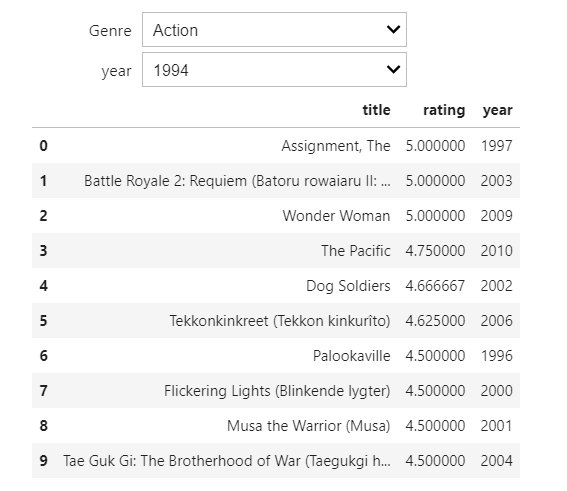

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# lets split all the Genres into Transactions
genres = data['genres'].str.split('|')
te = TransactionEncoder()
genres = te.fit_transform(genres)
genres = pd.DataFrame(genres, columns = te.columns_)
genres.head()

In [ ]:
# lets convert this data into boolean so that we can perform calculations
genres = genres.astype('int')
genres.insert(0, 'title', data['title'])
genres.head()

In [ ]:
genres.rename(columns = genres.iloc[0])

In [ ]:
# lets Transpose the Dataset
genres = genres.transpose()
genres = genres.rename(columns = genres.iloc[0])
genres = genres.drop(genres.index[0])
genres = genres.astype(int)
# lets check the head of genres
genres.head()

In [ ]:
# making a recommendation engine for getting similar movies
sorted(data['year'].unique(), reverse=True)
@interact
def recommendation_movie(movie = sorted(genres.columns.unique(), reverse=False)):    
    similar_movies = genres.corrwith(genres[movie])
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies=similar_movies.dropna()
    similar_movies=similar_movies.reset_index()
    similar_movies.columns = ['Movie', 'Score']
    similar_movies=similar_movies[similar_movies['Movie']!=movie]
    similar_movies.Score=round((similar_movies.Score*100),2)
    if len(similar_movies)== 0:
        return print('\n\t\t No Recommendation!!!')
    else:
        return similar_movies.head()

-------------------------------------------------------------------------
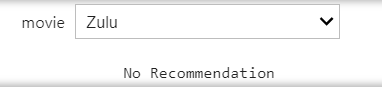


--------------------------------------------------------------------------

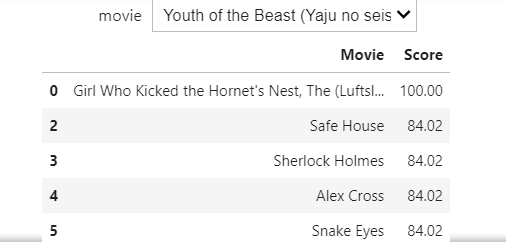

---------------------------------------------------------------------------